In [358]:
# GENERATING THE DATA FOR CSV FILES
import numpy as np
from random import random
from random import shuffle
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
# Generates a list containing n-number of factors

#seed for consistent results
np.random.seed(0)

#creates the column headers for the factors
def populate_factors(n):
    s = 'Factor '
    f = [s+str(i) for i in range(1,n+1)]
    return f

# Randomly generates a list of sigma values (std deviations) corresponding to the number of factors between [0.1,0.3] 
def get_std_devs(factors):
    std_devs = []
    for i in factors:
        
        # Sampling from adding a normal and a uniform distribution to get the standard deviations for each factor
        # the sum of the normal and uniform was done to sample from a distribution that is uniform-like but has
        # potential for extreme values
        v = np.random.normal(0,.05,1) + np.random.uniform(0.1,0.25,1)
        std_devs.append(v)
    return std_devs

# This iterates over the factors to build covariance between factors as is seen in real-market factors
# Factors are are covariant with varrying numbers of other factors
def addCov(facts):
    df = pd.DataFrame(pct_changes).transpose()
    num_facts = len(facts)
    count = 0
    
    #this will be the list of shuffled indices so factors' covariances are not calculated in order
    indices = [i for i in range(0, num_facts)]
    shuffle(indices)
    
    #iterates over the factors adding covariance
    for j in indices:
        #chooses the number of factors to be covariant to
        num_cov = (int)((max(min(np.random.poisson(5,1) + np.random.normal(5, 10, 1),  num_facts -1), 0)) )
        if num_cov > 0:
            covs = (np.random.uniform(1,num_facts,num_cov))
            covs = [(int)(i) for i in covs]
#             print("Factor number " + str(j) + " is covariant with:\t" + str(covs))
            weight = 1 / num_cov

            #creates the covariance component of the series
            temp = df.iloc[:, j].copy()
            df.iloc[:, j] = df.iloc[:,j] * 0
            for i in covs:
                df.iloc[:, j] = df.iloc[:,j] + df.iloc[:,i] * weight

            df.iloc[:, j] = df.iloc[:,j] * 3 + temp
        count += 1


    return list(df.transpose().values)
    
    
        
    
# Samples from a normal distribution n-times to get the pct change for n-number of data points using the sigma values generated
def get_pct_changes(n,std_devs):
    p = []
    for dev in std_devs:
        # s is a list, so pct changes is a list of lists
        s = list(np.random.normal(0,dev,n))
        p.append(s)
        
    
    return p


# Calculates the returns on index based on time-units
def get_returns(pct_changes,numDataPoints):
    rets = []

    num_returns = numDataPoints
    i = 0
    tmp = 0
    factor_number = 0;
    while(i!=num_returns):
        summing = 0
        factor_number = 0
        for factor_change in pct_changes:
            factor_number+=1
            
            #each factor has slightly more influence on the returns
            tmp = max( 5*factor_number - 200,0 )
            
            #the weight of each factor is sampled from a uniform distribution
            w = np.random.uniform(0.1*tmp,1.4*tmp)
            
            #adds the weighted factor component
            summing+=w*factor_change[i]

        rets.append(summing)
        i+=1
    return rets



def add_jumps(pcts):
    
    for i in range(1,numFactors):
        pcts[i] += np.random.poisson(.1, numDataPoints) * np.random.normal(0, .1, numDataPoints)
        
    return pcts
        

numFactors=100
numDataPoints = 1000


factors = populate_factors(numFactors)
std_devs = get_std_devs(factors)
pct_changes = get_pct_changes(numDataPoints,std_devs)
pct_changes2 = addCov(pct_changes)
pct_changes2 = add_jumps(pct_changes2)
returns = get_returns(pct_changes2,numDataPoints)





print(max(returns))
print(min(returns))
print(sum(returns)/len(returns))



4714.618765894665
-4830.92358644
7.548793018078443


In [359]:
np.random.poisson(5,100) + np.random.normal(5, 10, 100)

array([  7.67778583,  17.58831229,  12.39393472,   6.11836509,
        14.28207712,  14.76563996,   1.14917373,  20.28947744,
        19.61768077,  10.7640397 ,  20.61719054,   4.90492465,
        22.20106258,  16.09845891,  22.24632552,   4.37230918,
        10.75680083,   4.0885525 ,   3.23757762,  -4.49184088,
         6.07991216,  15.24455987,   0.92986968,  21.10586645,
        19.75407648,  14.65599027,  -5.69044799,   3.27064463,
        20.22276137,   5.5862134 ,  -3.21302527,   9.80356761,
         8.93794365,   6.27022529,  12.48627838,  13.13908943,
        -3.11643038,   9.09026672,   4.14852774,  12.44450169,
        16.33389507,   7.74294302,   7.93863997, -20.42171077,
         4.75550119,  12.03335785,  23.29827833,  -5.90728609,
       -13.84982813,  24.66534061,   5.43250071,  13.39918661,
         6.70361252,  16.3243881 ,   8.54308855,  10.80040767,
        14.21097453,  17.49090613,   9.72468024,  -0.65085889,
        11.23591818,   4.80899521,  16.516576  ,   2.82

In [360]:
df = pd.DataFrame(pct_changes2).transpose()

In [361]:
df.to_csv("./percent_changes.csv")

In [362]:
df2 = pd.DataFrame(returns)

In [363]:

df2.to_csv("./returns.csv")

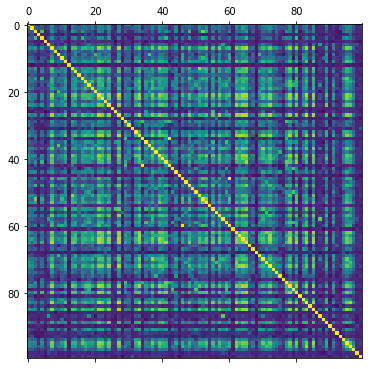

In [366]:
plt.matshow(df.corr())

In [367]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.240383,0.198762,0.052297,0.234841,0.086620,0.141461,0.420645,0.174600,0.102920,...,0.004050,0.190799,0.085869,0.067288,0.337696,0.425601,0.399035,0.199271,0.035248,0.036412
1,0.240383,1.000000,0.197904,0.173177,0.182419,0.048539,0.126960,0.383879,0.147464,0.101737,...,-0.001442,0.089382,0.001464,0.152496,0.242101,0.402985,0.361394,0.195908,0.029405,0.062280
2,0.198762,0.197904,1.000000,-0.024498,0.653914,-0.026352,0.041422,0.463323,0.204457,0.022081,...,0.014061,0.035568,-0.040443,-0.030765,0.234905,0.395302,0.310018,0.091121,0.030755,0.018288
3,0.052297,0.173177,-0.024498,1.000000,0.008111,0.005540,-0.013140,0.106316,0.006785,-0.002041,...,0.038402,-0.010995,-0.027746,-0.046362,0.016947,0.018413,0.199329,0.019824,0.003806,0.029088
4,0.234841,0.182419,0.653914,0.008111,1.000000,-0.025232,0.128768,0.457395,0.130806,0.059206,...,0.009234,0.047480,-0.038035,-0.016669,0.368089,0.452921,0.317092,0.124658,0.028379,0.018046
5,0.086620,0.048539,-0.026352,0.005540,-0.025232,1.000000,0.005000,0.122590,0.056532,0.058731,...,-0.038589,-0.039098,0.009502,-0.006153,0.022976,0.041349,0.054678,0.008588,-0.035944,-0.057132
6,0.141461,0.126960,0.041422,-0.013140,0.128768,0.005000,1.000000,0.160121,0.030175,0.091542,...,0.026022,0.388052,0.047748,0.001134,0.190495,0.279654,0.158866,0.125241,0.148520,-0.002737
7,0.420645,0.383879,0.463323,0.106316,0.457395,0.122590,0.160121,1.000000,0.267975,0.368651,...,-0.035950,0.394313,0.048989,0.012793,0.396637,0.757876,0.711830,0.309173,0.036132,0.035770
8,0.174600,0.147464,0.204457,0.006785,0.130806,0.056532,0.030175,0.267975,1.000000,0.028927,...,-0.006988,0.100660,0.014600,0.037003,0.078033,0.250758,0.188262,0.084110,0.083018,0.010869
9,0.102920,0.101737,0.022081,-0.002041,0.059206,0.058731,0.091542,0.368651,0.028927,1.000000,...,-0.047495,0.339908,-0.000563,0.066903,0.121933,0.300411,0.344762,0.088778,-0.012167,0.012291
